## This notebook demonstrates the usage of SIDMpy, a python package to compute the central density of SIDM halos using a simple Jeans argument presented by Kaplinghat et al. 2016

In [96]:
from sidmpy.sidmpy import solve_from_NFW_params
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15

To start we'll assume a functional form for the SIDM cross section given by 

\begin{equation}
\sigma\left(v\right) = \sigma_0 \left(1 + \frac{v^2}{v_0^2}\right)^{-2}
\end{equation}

The name of the cross section implemented for this parameterization is TCHANNEL. In the above equation, the velocity $v$ is the relative speed of two SIDM particles, which we could reasonably equate with the central velocity dispersion of the SIDM halo. We don't know this a-priori, but we can compute it simultaneously with the central density of the isothermal part of the halo. Other cross section models currently implemented are POWER_LAW and VELOCITY_INDEPENDENT. 

In the cell below, we'll compute the central density of a cored halo $\rho_0$ using the prescription first described by Kaplinghat et al. 2016. We'll turn plotting on to visualize the solution space for the central density $\rho_0$ and 
the central velocity dispersion $\sigma_v$. The colors indicate the goodness of fit for combination of $\sigma_v$ and $\rho_0$. The solver will iterate until a solution is found with fit quality ~ 0.01, or one percent accuracy imposed on the boundary conditions for the SIDM halo profile (see Kaplinghat et al 2016).  

[ 5.98154884  7.02979993  7.9831579   9.046607    9.99996497 11.00523116]


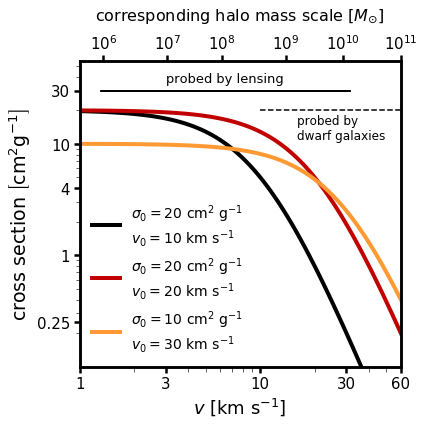

In [434]:
from sidmpy.CrossSections.tchannel import TChannel
import numpy as np
from matplotlib import cm
from sidmpy.Solver.util import nfw_velocity_dispersion, nfw_mass_from_velocity_dispersion

cmap = cm.gist_heat

cross_section_type = 'TCHANNEL'
cross_section_norm = 20. # cm^2/gram
v0 = 15
kwargs_cross_section = {'norm': cross_section_norm, 'v_ref': 10}
cross_section_model_1 = TChannel(**kwargs_cross_section)
kwargs_cross_section2 = {'norm': 20., 'v_ref': 20}
cross_section_model_2 = TChannel(**kwargs_cross_section2)
kwargs_cross_section3 = {'norm': 10., 'v_ref': 30}
cross_section_model_3 = TChannel(**kwargs_cross_section3)

fig = plt.figure(1)
fig.set_size_inches(6, 6)

ax1 = plt.subplot(111)
ax2 = ax1.twiny()
v = np.logspace(np.log10(1), np.log10(60), 100)

sigma1 = cross_section_model_1.evaluate(v)
sigma2 = cross_section_model_2.evaluate(v)
sigma3 = cross_section_model_3.evaluate(v)
logv = np.log10(v)
ax1.loglog(v, sigma1, color='k', lw=4, label=r'$\sigma_0 = 20 \ \rm{cm^2} \ \rm{g^{-1}}$' + '\n'+ r'$v_0 = 10 \ \rm{km} \ \rm{s^{-1}}$')
ax1.loglog(v, sigma2, color=cmap(0.5), lw=4, label=r'$\sigma_0 = 20 \ \rm{cm^2} \ \rm{g^{-1}}$' + '\n'+ r'$v_0 = 20 \ \rm{km} \ \rm{s^{-1}}$')
ax1.loglog(v, sigma3, color=cmap(0.8), lw=4, label=r'$\sigma_0 = 10 \ \rm{cm^2} \ \rm{g^{-1}}$' + '\n'+ r'$v_0 = 30 \ \rm{km} \ \rm{s^{-1}}$')
ax1.legend(loc=3, frameon=False, fontsize=14, labelspacing=0.5)
ax1.set_xlabel(r'$v \ \left[\rm{km} \ \rm{s^{-1}}\right]$', fontsize=18)

meff = nfw_mass_from_velocity_dispersion(v)
logmeff = np.round(np.log10(meff), 1)
xmin, xmax = v[0], v[-1]
ax1.set_xlim(xmin, xmax)
ax1.set_xticks([1, 3, 10, 30, 60])
ax1.set_xticklabels(['1', '3', '10', '30', '60'])

ax1.set_yticks([0.25, 1, 4, 10, 30])
ax1.set_ylim(0.1, 55)
ax1.set_yticklabels([0.25, 1, 4, 10, 30])

x, y = [10, 60], [20, 20]
ax1.plot(x, y, color='k', linestyle='--')
ax1.annotate('probed by\ndwarf galaxies', xy=(16, 11), fontsize=12)
ax1.arrow(1.3, 30, 30, 0, width=1, head_width=0, head_length=0, color='k')
ax1.annotate('probed by lensing', xy=(3, 36), fontsize=13, color='k')

ax2.set_xlim(xmin, xmax)
vi_values = [1.4, 3, 6, 13, 26, 54]
ax2_tick_labels = np.log10([nfw_mass_from_velocity_dispersion(vi) for vi in vi_values])
print(ax2_tick_labels)
ax2_tick_labels = [r'$10^{6}$', r'$10^{7}$', r'$10^{8}$', r'$10^{9}$', r'$10^{10}$', r'$10^{11}$']
idx = [np.argmin(abs(vi - v)) for vi in vi_values]
ax2.set_xticks(idx)
ax2.set_xticklabels(ax2_tick_labels)
ax1.set_ylabel('cross section '+r'$\left[\rm{cm^2}\rm{g^{-1}}\right]$', fontsize=19)
ax2.set_xlabel('corresponding halo mass scale '+r'$\left[M_{\odot}\right]$', fontsize=16, labelpad=13)
plt.tight_layout()
plt.savefig('cross_section.pdf')

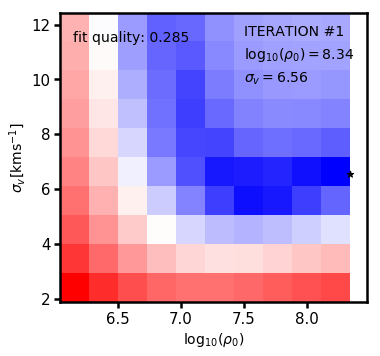

continue with next iteration... 1


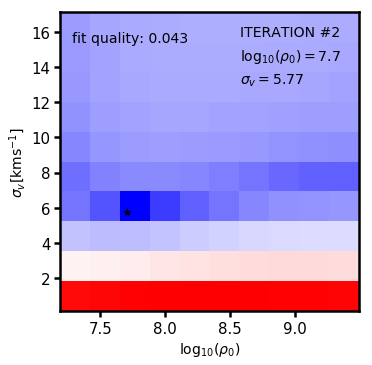

continue with next iteration... 1


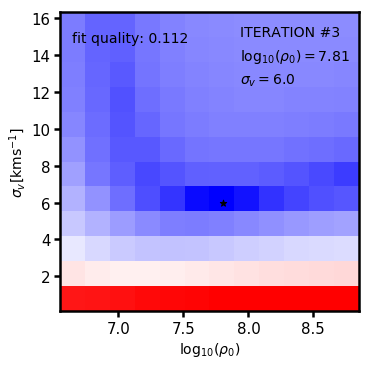

continue with next iteration... 1


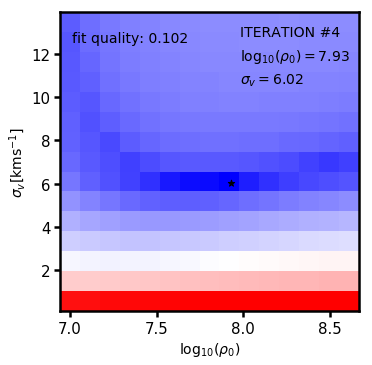

continue with next iteration... 1


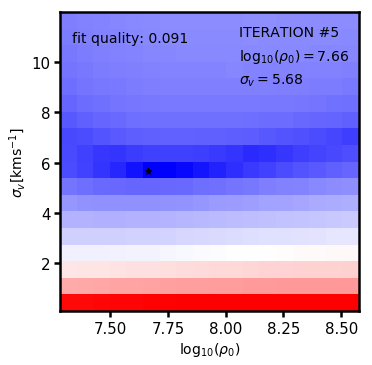

continue with next iteration... 1


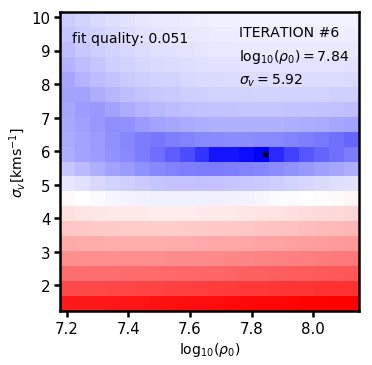

continue with next iteration... 1


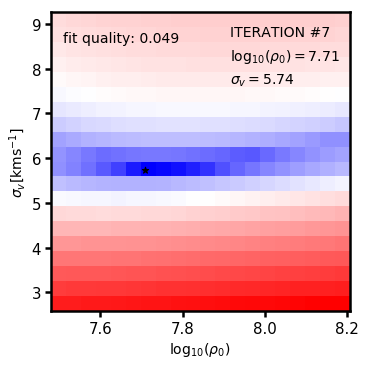

continue with next iteration... 1


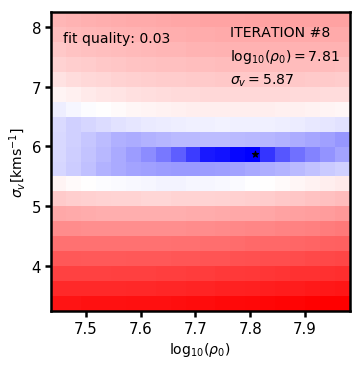

continue with next iteration... 1


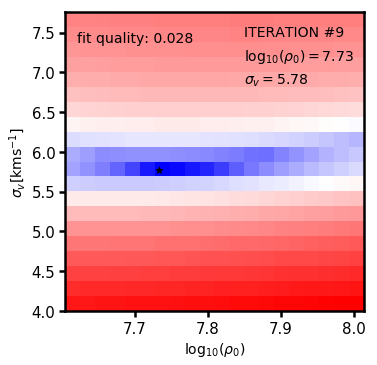

continue with next iteration... 1


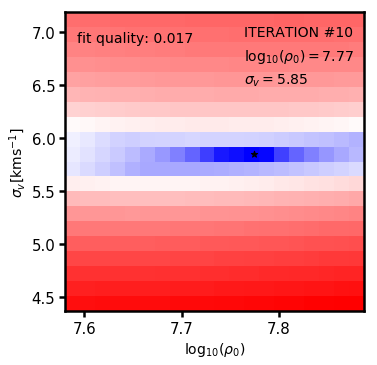

continue with next iteration... 1


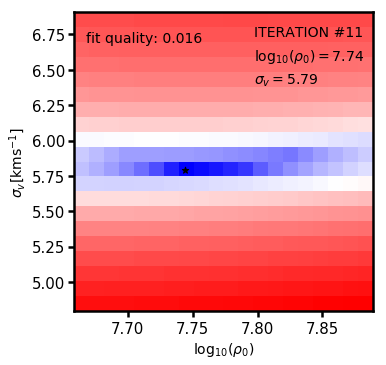

continue with next iteration... 1


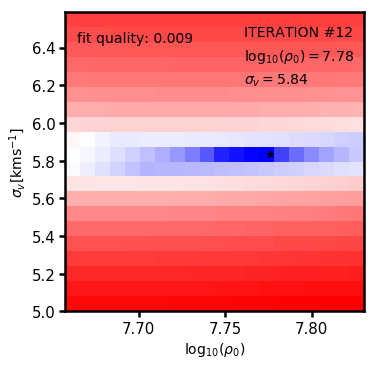

continue with next iteration... 1
solution found: 59650152.458382785 5.835615200868922


In [300]:
### specify the parameters describing an NFW halo: density normalization, scale radius, and the age of the halo
# rhos, rs computed for a 10^8 halo at z = 0.5 in units M_sun/kpc^3 and kpc, respectively
rhos, rs = 21959479.819181114, 0.590
halo_age = 10. # Gyr
kwargs_cross_section = {'norm': 20., 'v_ref': 30}
rho_core, velocity_dispersion, r_1 = solve_from_NFW_params(rhos, rs, halo_age, cross_section_type, 
                                                           kwargs_cross_section, plot=True)
print('solution found:', rho_core, velocity_dispersion)

### Now we can plot the profile

We'll compare the isothermal solution to an NFW profile and a cored NFW profile

\begin{equation}
\rho\left(r, r_c, r_s\right) = \frac{\rho_s}{\left(x^a + \beta^a\right)^{\frac{1}{a}}\left(1+x\right)^2}
\end{equation}

where $\beta = \frac{r_c}{r_s} = \frac{\rho_0}{\rho_s}$ and $x = \frac{r}{r_s}$. The parameter $a$ sets how rapidly the profile transiations from cored to NFW-like. Larger values of $a$ seem to be better matches to the density profiels of SIDM halos in simulations, however, the only value for which analytic solutions exist for the deflection angle is $a=1$. Below, we'll set $a=10$. 

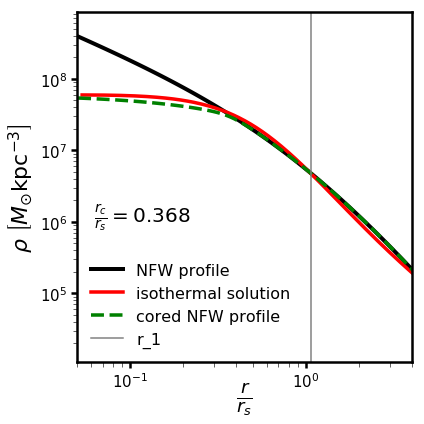

In [307]:
from sidmpy.Profiles.sidm_profile import SIDMprofile
from sidmpy.Profiles.nfw_like import TNFWprofile, coreTNFWprofile
import numpy as np

prof = SIDMprofile(rho_core, velocity_dispersion, r_1, rhos, rs, xmin=0.05, xmax=5)
#prof = SIDMprofile.fromNFWparams(rhos, rs, halo_age, cross_section_type, kwargs_cross_section, xmin=0.01, xmax=10)
r = np.logspace(-1.4, 1, 100) * rs
density_composite = prof(r, smooth=True, smooth_scale=0.1)

rt = 1e+6 * rs
rc = rhos * rs / rho_core
density_nfw = TNFWprofile(r, rhos, rs, rt)
density_isothermal = prof.rho_isothermal
density_approx = coreTNFWprofile(r, rhos, rs, rt, rc, a=10)

cmap = cm.gist_heat

fig = plt.figure(1)
fig.set_size_inches(6,6)
ax = plt.subplot(111)
ax.loglog(r/rs, density_nfw, color='k', label='NFW profile', lw=4)
ax.loglog(prof.r_iso/rs, prof.rho_isothermal, color='r', label='isothermal solution', lw=3.5)
#ax.loglog(r, density_composite, color='g', linestyle='--', label='composite profile', lw=4)
ax.loglog(r/rs, density_approx, color='g', linestyle='--', label='cored NFW profile', lw=3.5)
ax.axvline(r_1/rs, color='0.5', label='r_1')
ax.annotate(r'$\frac{r_c}{r_s} = $'+str(np.round(rc/rs, 3)), xy=(0.05, 0.4), xycoords='axes fraction', fontsize=20)
ax.legend(fontsize=16, frameon=False)
ax.set_xlim(0.05, 4)
ax.set_xlabel(r'$\frac{r}{r_s}$', fontsize=26, labelpad=-10)
ax.set_ylabel(r'$\rho \ \left[M_{\odot} \rm{kpc^{-3}}\right]$', fontsize=22)
plt.tight_layout()
plt.savefig('SIDMprofile.pdf')

## Interpolated solutions

solutions for the central core density are pre-computed and saved for a subset of possible cross section models. They are accurate to within 30% at worst, but much faster to compute. 

In [ ]:
from sidmpy.sidmpy import solve_with_interpolation
from sidmpy.sidmpy import solve_from_Mz

cross_section_type = 'TCHANNEL'
kwargs_cross_section = {'norm': 3., 'v_ref': 30.}
concentration_offset_from_median = 0. # in dex
rho0_from_interp = solve_with_interpolation(10 ** 7.5, 0.6, concentration_offset_from_median, cross_section_type, kwargs_cross_section)
rho0_exact_solution = solve_from_Mz(10**7.5, 0.6, cross_section_type, kwargs_cross_section)[0]
print(rho0_from_interp/rho0_exact_solution)